In [ ]:
 import tqdm.notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

## 2.2 여러 팔 강도 문제의 해법

#### 기대 보상 계산 공식 및 의사코드

$$ Q_k(\alpha) = \frac{R_1 + R_2 + \cdots R_k}{k_\alpha} $$



In [ ]:
def exp_reward(action, history):
  rewards_for_action = history[action]
  return sum(rewards_for_action) / len(rewards_for_action)

### 탐험과 활용

#### 기대 보상에 근거해서 최선의 동작을 선택하는 방법

$$
\forall a_i \in A_k
$$



$$
a^* = argmax_a Q_k(a_i)
$$

In [ ]:
def get_best_action(actions, history):
  exp_rewards = [exp_reward(action, history) for action in actions]

  return argmax(exp_rewards)

#### 기대 보상에 근거해서 최선의 동작을 찾는 코드

In [ ]:
def get_best_action(actions):
  best_action = 0
  max_action_value = 0
  for i in range(len(actions)):                               ## 모든 가능한 동작을 훑는다
    cur_action_value = get_action_value(actions[i])           ## 현재 동작의 가치를 구한다
    if cur_action_value > max_action_value:
      best_action = i
      max_action_value = cur_action_value
  return best_action

 위 함수는 모든 동작에 대해 $Q_k(a)$ 함수를 계싼하고, 가치(기대 보상)가 가장 큰 동작을 선택한다. 현재의 $Q_k(a)$는 전적으로 이전 동작 보상들에 의존하므로, 아직 시도하지 않은 동작들은 절대로 선택되지 않는다. 이처럼 지금까지의 경험에만 근거해서 최선의 것을 선택하는 접근 방식을 탐욕법?(greedy method)이라고 부른다.



### 엡실론 탐욕 전략

진정으로 최선의 동작을 발견하려면 다른 레버들도 탐험해 보아야 한다. 앞의 알고리즘을 조금 수정하면 소위 엡실론 탐욕 알고리즘이 된다. 엡실론 탐욕 알고리즘은 $\epsilon^{엡실론} $의 확률로 무작위 선택(탐험)을 적용하고 $1-\epsilon$의 확률로 탐욕법(활용)을 적용한다. $\epsilon$을 충분히 작게 잡으면 알고리즘은 대ㅔ부분의 경우에는 탐욕적으로 행동하되, 가끔 무자구이로 레버를 당기는 모험을 강행한다. 그리고 가끔씩 수행하는 무작위 선택은 이후의 탐욕적 선택에 영향을 미친다.

#### 엡실론 탐욕 전략에 따른 동작 선택

In [ ]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10                          ## 팔의 수(슬롯머신 개수)
probs = np.random.rand(n)       ## 각 팔과 연관된 (미지의) 확률, 최대 상금 $10
eps = 0.2                       ## 엡실론 탐욕 동작 선택에 사용하는 엡실론 값

 여기서 슬롯머신의 보상(상금)을 계산하는 방법은 0에서 1사이의 부동소수점 난수를 구해서 그것이 슬롯머신의 확률보다 작으면 보상에 1을 더하는 과정을 10회 반복하는 방법을 사용한다. 반복이 끝나면 그떄까지 누적된 보상이 최종 상금이다.  예를 들어 슬롯머신의 확률이 0.7이라고 할 때, 첫 반복에서 난수가 0.4가 나왔다면, 0.4는 0.7보다 작으므로 보상에 1을 더한다. 그 다음 반복에서 0.6이 나왔다면, 역시 0.7보다 작으므로 보상에 1을 더한다. 이러한 과정을 10회 반복하면 보상은 0에서 10사이의 값이 된다. 확률이 0.7이므로, 이 과정을 무한히 반복하면 평균 보상이 7이 되겠지만, 10회 반복 정도로는 그보다 작거나 큰 값이 나올 수 있다.

#### 보상 함수

In [ ]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [ ]:
### 이를 10000번 반복하면 실제로 평균 보상 7에 가까운 값이 나온다
reward_test = [get_reward(0.7) for _ in range(10000)]
np.mean(reward_test)

7.0096

(array([   3.,   19.,   89.,  367., 1062., 1930., 2625., 2384., 1227.,
         294.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

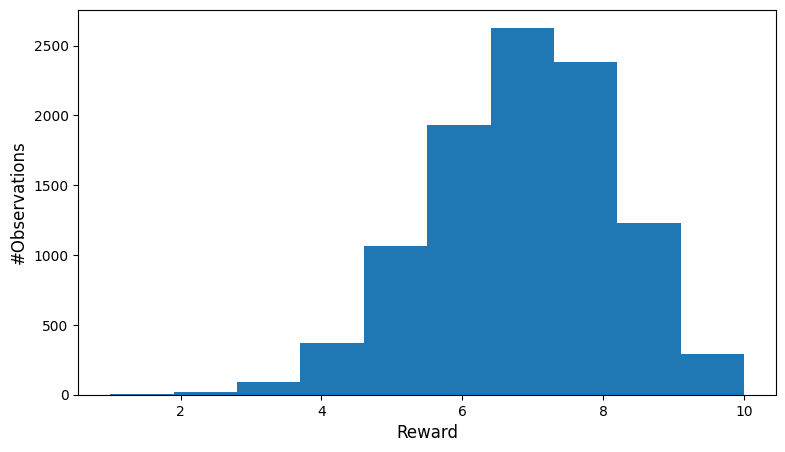

In [ ]:
### 관찰(시행) 반복횟수와 보상의 관계를 보여주는 히스토그램
plt.figure(figsize = (9, 5))
plt.xlabel("Reward", fontsize = 12)
plt.ylabel('#Observations',  fontsize = 12)
plt.hist(reward_test, bins = 10)

지금까지 경험에서 가장 나은 레버를 선택하는 탐욕법을 구현하기 위하여 어떤 레버를 당겼고 그 보상이 얼마였는지를 기록하고자 한다. 각 레버의 평균 보상을 기억하므로써 이를 확인할 수 있다. 수들의 산술평균을 구하는 공식은 다음과 같이 정의된다

$$
\mu = \frac{1}{k}\sum_i x_i
$$

In [ ]:
sum = 0
x = [4,5,6,7]
for i in range(len(x)):
  sum = sum + x[i]

한 레버의 평균 보상 $\mu$를 구한 상태에서 그 레버를 다시 당겨서 새 보상을 얻었을 때 새 평균을 구하기 위해 기존의 모든 보상을 다시 합산할 필요는 없다. 현재 평균을 총합으로 되돌린 후 다시 평균을 계산하면 된다. $\mu$에 기존 보상 개수 $k$를 곱하면 총 보상이 된다. 총 보상에 새 보상을 더하고 $k+1$로 나누어 새 평균을 구할 수 있으며 이를 수식으로 표현하면 다음과 같다.

$$
\mu_{new} = \frac{k \cdot \mu_{old} + x}{k+1}
$$

레버를 당겨서 새 보상을 받을 때마다 이 공식을 이용해서 평균을 갱신하는 접근 방식에서는 레버당 두 개의 데이터, 즉 보상 개수 $k$와 이동평균(running average; 현재까지의 평균) $\mu$만 기억하면 된다. 결론적으로, 레버가 총 10개라고 할 때 다음과 같은 $10\times 2$ NumPy 배열 하나로 표현이 가능하다.

In [ ]:
import numpy as np
n = 10
record = np.zeros((n, 2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

위 record 배열의 각 항목은 두 개의 수치로 이루어지며, 첫 수치(제 1열)은 해당 레버(0번 항목이 첫 슬롯머신의 레버)를 당긴 횟수이며 둘째 수치(제 2열)은 현재까지의 이동 평균이다. 새 동작과 그 보상으로 배열을 갱신하는 함수는 다음과 같다.

In [ ]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

위 함수는 갱신할 record 배열과 동작, 그리고 그 동작에 대한 보상을 받는다. 여기서 동작은 당긴 레버의 색인이다. 함수는 해당 레버의 평균 보상과 레버의 당긴 횟수를 갱신한다.

다음의 함수는 에이전트가 당길 레버를 탐욕적으로 선택하는 함수이다. 편군 보상이 가장 큰 레버를 선택하려면 record 배열에서 둘째 수차가 가장 큰 항목을 찾아야 한다. NumPy의 argmax 함수가 이러한 기능을 제공하며 이를 통하여 배열에서 가장 큰 항목을 찾고 그 항목의 색인을 return 받을 수 있다.

In [ ]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)  ## record의 제 1열에 대해 NumPy의 argmax를 적용한다.
    return arm_index

In [ ]:
get_best_arm(record)

array([0, 0])

앞서 만든 함수들을 활용하여 n-armed bandit 문제를 푸는 함수를 만들고자 한다. 우선 난수 하나를 발생시켜서 그것이 epsilon보다 크면 get_best_arm 함수를 이용해서 최선의 동작(레버)를 선택하고, 크지 않으면 탐험을 위해 무작위로 동작을 선택하게 한다. 동작을 선택한 다음에는 get_reward 함수로 그 보상을 구하고 그것으로 record 배열을 갱신한다. 이러한 과정을 충분히 반복한 후 record 배열을 조사해 보면 평균 보상이 가장 큰 레버를 파악할 수 있다.

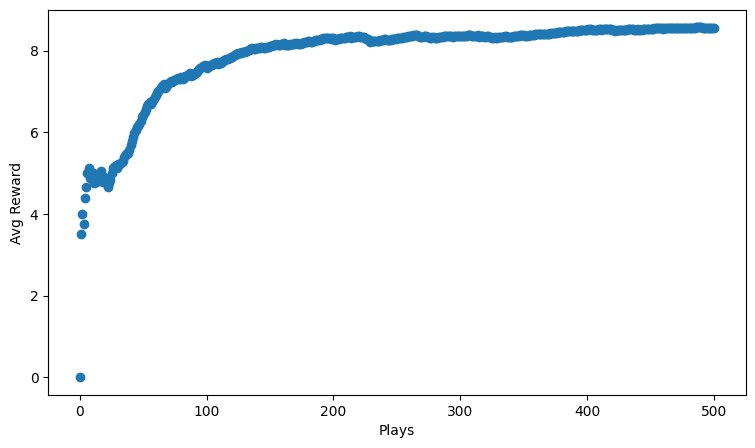

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


record = np.zeros((n, 2))                                   ## record 배열의 모든 항목을 0으로 초기화
probs = np.random.rand(n)                                   ## 각 레버의 보상 확률을 무작위로 초기화
eps = 0.2
rewards = [0]

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    if random.random() > 0.2:                              ## 20%의 확률로 탐험(무작위 선택)을, 80%의 확률로 활용(최선의 동작 선택)을 적용
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])                          ## 선택된 동작(레버)의 보상으로 record 배열을 갱신
    record = update_record(record,choice,r)                ## 동작에 대한 보상으로 record 배열을 갱신
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)          ## 전체적인 성과를 평가하기 위해 지금까지의 보상 이동 평균을 갱신
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

위의 그래프에서 볼 수 있듯, 시행 횟수가 증가함에 따라 평균 보상이 증가하는것을 볼 수 있다. 이는 이전의 좋은 선택들이 이 알고리즘을 강화한다는 것을 의미하며 따라서 단순하지만 실제로 학습 능력을 갖춘 강화학습 알고리즘이라고 할 수 있다.

지금까지 확인해본 여러 armed bandit 문제에서 각 팔의 보상 확률은 시간이 지나도 변하지 않는다. 이러한 성격의 문제를 시불변 문제(stationary problem)라고 부르며 보상 확률이 시간에 따라 변한다면 시변 문제(nonstationary problem)이라고 한다.

### 2.2.2 소프트맥스 선택 정책

소프트맥스(softmax) 선택에서는 탐험 시 무작위로 하나의 동작을 선택하는 대신, 소프트맥스 함수를 이용해서 선택 가능한 옵션들의 확률분포를 얻는다. 확률이 가장 큰 옵션을 선택하는 것은 이전 해법에서 최선의 레버 하나를 선택하는 것과 같다.

$$
Pr(A) = \frac{\epsilon ^Q_{k}(A)/\tau }{\sum_{i=1}^n \epsilon ^ Q_k (i)/\tau}
$$

In [ ]:
### 소프트맥스 함수
def softmax(vals, tau):
  softm = np.exp(av / tau) / np.sum(np.exp(av / tau))
  return softm

In [ ]:
### softmax 함수와 NumPy의 무작위 선택 함수(random.choice)의 사용법을 보여주는 코드
x = np.arange(10)
av = np.zeros(10)
p = softmax(av, tau = 1.12)
np.random.choice(x, p = p)

3

In [ ]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

NumPy의 arange 함수를 이용해서 0에서 9까지의 값을 담은 배열을 만든다. 이 값들은 각 레버의 색인에 해당한다. 이 배열을 random.choice 함수의 첫 인수로 사용하므로, 결과적으로 random.choice는 둘째 인수로 주어진 확률분포에 따라 하나의 레버를 선택하게 된다.

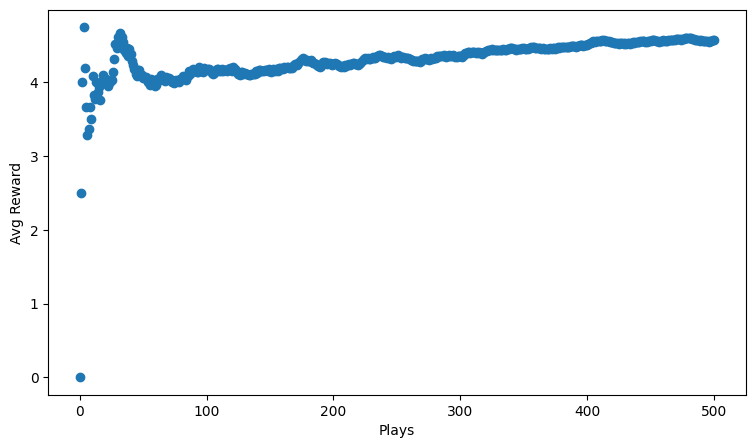

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7)                      ## 현재 동작 차기로 각 레버이 소프트맥스 확률을 갱신
    choice = np.random.choice(np.arange(n),p=p)           ## 소프트맥스 확률분포에 따라 하나의 레버를 무작위로 선택
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

위 그래프를 앞선 엡실론 탐욕법보다 더 빠르게 최적 동작에 수렴하는 것을 알 수 있다. 그러나 소프트맥스는 $\tau$d에 매우 민감하기 때문에 여러 시행작오를 거쳐 적당한 값을 찾는 데에는 시간이 필요하다.

#### 2.3.2 상태, 동작, 보상

강화학습 알고리즘은 세상이 상태(환경에 관한 특징들로 이루어진)들의 집합 $S$(상태공간)와 각 상태에서 취할 수 있는 동작들의 집합 $A$(동작 공간)만으로 구성된다고 간주한다. 어떤 한 상태에서 어떤 한 동작을 취한다고 할 때, 그러한 상태와 동작의 조합을 상태-동작 쌍(state-action pair)이라고 부르고 $(s, a)$의 형태로 표기한다.


 적절히 훈련된 신경망은 별로 쓸데없는 세부 사항들을 제거하고 중요한 본질 또는 추상들만 배우는 데 탁월하다. 신경망은 데이터에 존재하는 조합 가능한 패턴과 규칙성을 잘 배우며, 그 덕분에 대량의 데이터를 중요한 정보는 유지하면서 효과적으로 압축할 수 있다. 따라서 신경망을 이용하면 모든 가능한 상태-동작-보상 조합들을 일일이 메모리에 저장하지 않고 상태-동작 쌍드로가 보상들 사이의 복잡한 관계를 배우는 것이 가능하다. 전체 강화학습 알고리즘 중 어떤 정보에 기초해서 결정을 내리는 부분을 에이전트라고 부른다.

### 2.4 PyTorch로 신경망 만들기

In [ ]:
import numpy

numpy.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
import torch

torch.Tensor([[1,2,3], [4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

#### 2.4.1 자동 미분

In [ ]:
x = torch.Tensor([2,4])
m = torch.randn(2, requires_grad=True) # 매개변수 1
b = torch.randn(1, requires_grad=True) # 매개변수 2
y = m*x + b # 선형 회귀 모형
loss = (torch.sum(y_known - y)) ** 2 # 손실함수
loss.backward() # 기울기들이 계산된다.
m.grad

#### 2.4.2 모형의 구축

In [ ]:
from torch.nn import Module, Linear

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(10, 150),
    torch.nn.ReLU(),
    torch.nn.Linear(150, 4),
    torch.nn.ReLU(),
)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
for step in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_correct)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x는 모형에 입력하는 훈련 데이터이고 y_correct는 분류된 데이터(정답)이며, 입력 x에 대해 모형이 예측(또는 분류)한 결과인 y_pred와 정답 y_correct로 손실값을 계산하고, 계산 그래프의 마지막 노드(거의 항상 손실함수)에 대해 backward 메서드를 호출해서 기울기들을 계싼한다. 그런 다음 최적화기의 step 메서드를 호출해서 경사 하강법의 한 단계를 수행한다.

아래의 모형은 더 복잡한 구조의 신경망 모형을 구축하기 위하여 PyTorch의 Module 클래스를 상속해서 새로운 클래스를 정의한 것이다.

In [ ]:
class MyNet(Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.fc1 = Linear(784, 50)
    self.fc2 = Linear(50, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.reul(self.fc2(x))
    return x

model = MyNet()

### 2.5 문맥적 강도 문제의 해법

In [ ]:
### 문맥적 강도 문제의 환경
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()

    def init_distribution(self, arms):                                        ### 단순한 해법을 위해, 상태의 개수를 팔(레버)의 개수와 같게 두었다. bandit_matrix 행렬의 각 행은 특정 상태에, 각 열은 특정 레버에 대응된다.
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm

    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward

    def get_state(self):
        return self.state

    def update_state(self):
        self.state = np.random.randint(0,self.arms)

    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])

    def choose_arm(self, arm):                                                ### 이 메서드는 선택된 레버에 해당하는 포상을 구해서 상태를 갱신하고 보상을 돌려준다.
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [ ]:
import numpy as np
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms                               ###  N : 배치(batch), D_in : 입력 벡터의 차원, H : 은닉층의 차원, D_out : 출력 벡터의 차원

In [ ]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)

8


ContextBandit에는 소프트맥스 함수와 원핫(one-hot)부호화를 위한 보조 수단들이 있다. 원핫 부호화 방식으로 부호화된 벡터는 성분 하나만 1이고 나머지 모든 성분이 0으로 구성되어 있다.

기존의 여러 팔 강도 문제에서는 n개의 동작에 대해 동일한 보상 확률분포를 사용했지만, 문맥적 강도 시물레이터는 각 상태의 동작들에 대해 서로 다른 보상 확률분포를 사용한다. n가지 상태 각각의 동작에 대해 서로 다른 소프트맥스 보상 확률들을 사용한다.  

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [ ]:
loss_fn = torch.nn.MSELoss()

In [ ]:
env = ContextBandit(arms)

In [ ]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

In [ ]:
def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

In [ ]:
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state()))                      # 환경의 현재 상태로 PyTorch 텐서를 만든다
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state)                                                # 신경망을 실행해서 보상들을 예측한다
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0)                       # 소프트맥스를 이용해서 예측 보상들을 확률분포로 변환한다.
        av_softmax /= av_softmax.sum()                                           # 확률들의 합이 1이 되도록 정규화한다.
        choice = np.random.choice(arms, p=av_softmax)                            # 확률분포에 기초해서 무작위로 동작을 선택한다.
        cur_reward = env.choose_arm(choice)                                      # 해당 동작의 보상을 얻는다.
        one_hot_reward = y_pred.data.numpy().copy()                              # PyTorch 텐서를 NumPy 배열로 변환한다.
        one_hot_reward[choice] = cur_reward                                      # 보상을 원핫 벡터(분류된 훈련 데이터로 사용할)로 변환한다.
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state()))                  # 현재 환경 상태를 갱신한다.
    return np.array(rewards)

In [ ]:
rewards = train(env)

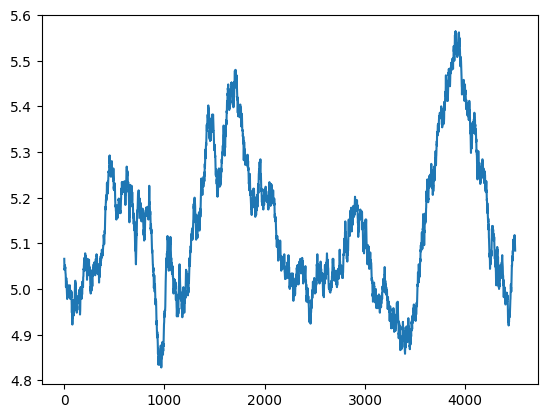

In [ ]:
plt.plot(running_mean(rewards,N=500))
plt.show()

### 2.6 마르코프 성질

신경망에서는 현재 상태를 입력하면 가능한 동작들의 기대 보상들을 산출한다. 강화학습에서 중요시되는 이러한 성질을 마르코프 성질(Markov property)라고 부르며, 마르코프 성질을 지닌 게임(또는 제어 과제)을 가리켜 마르코프 결정 과정(Markov decision process)이라고 부른다. 마르코프 결정 과정은 향후 보상(미래의 보상)들을 최대화하는 최적의 동작들을 오직 현재 상태의 정보만으로 결정한다. 강화학습을 위해선 주어진 제어 과제를 하나의 마르코프 결정과정으로 표현할 필요가 있다.

마르코프 결정 과정은 이전의 모든 상태나 동작을 고려할 필요가 없기 때문에, 그 모든 것을 기억하고 갱신할 필요가 없다. 따라서 강화학습 문제를 풀 때 가장 먼저 해야할 일은 문제를 하나의 마르코프 결정 과정으로 모형화하는 것이다.

### 2.7 향후 보상의 예측: 가치와 정책 함수

본질적으로 하나의 가오하학습 알고리즘은 어떤 **환경**에서 행동하는 **에이전트**를 구축한다. 환경은 어떤 게임일 때가 많지만, 좀더 일반적으로는 상태들과 동작들이 있고 보상들을 산출하는 과정이면 어떤 것일도 환경이 될 수 있다. 에이전트는 환경의 현재 상태를 입력받는데, 이때 하나의 상태 $s_t \in S$는 특정 시점($t$)에서 환경에 관한 모든 데이터의 집합이다. 에이전트는 이 상태 정보를 이용해서 어떤 동작 $a_t \in A$를 취한다. 그 동작은 환경을 결정론적으로 또는 확률적으로 변경하며, 그러면 환경의 현재 상태가 $s_{t+1}$로 바뀐다.

한 상태에서 다른 상태로의 전이는 특정한 확률로 일어나는데, 이를 전이확률(transition probability)이라고 부른다. 상태 $s_t$에서 에이전트가 동작 $a_t$를 취해서 상태 $s_{t+1}$로 전이하면 에이전트는 그에 다른 보상 $\gamma_i$를 받는다. 에이전트(강화학습 알고리즘)의 궁극의 목표는 이 보상들을 최대화하는 것이다. 같은 동작이라도 확률에 따라 서로 다른 상태로 이어질 수 있기 때문에 보상을 만들어내는 것은 동작의 선택 자체가 아니라 그에 따른 상태 전이 $s_t → s_{t+1}$라고 할 수 있다.

#### 2.7.1 정책 함수

현재 상태 정보를 이용해서 다음 동작을 선택하는 문제에서 중요한 개념이 **가치 함수**(value function)와 **정책 함수**(policy function; 방침 함수)이다. 정책 함수는 하나의 적책 $\pi$를 주어진 환경에서 에이전트가 사용하는 전략을 대표한다. 일반적으로 하나의 정책은 상태를 그 상태에서 가느앟ㄴ 동작들에 대한 확률분포로 사상(mapping)하는 하나의 함수이다.

$$\pi^* → Pr(A|s), \;s \in S$$

정책 $π$는 각 상태를 그 상태에서 최선의(확률적으로) 동작으로 사상하는 함수이다.

#### 2.7.2 최적 정책

강화학습 알고리즘에서 정책은 현재 상태에서 최선의 동작을 선택하는 역할을 한다. **최적 정책**(optimal policy), 즉 보상을 최대화하는 전략을 다음과 같이 공식화할 수 있다.

$$\pi^* =argmax \;E(R| \pi)$$

임의의 정책 $\pi$를 따를 때 받을 수 있는 기대 보상을 알고 있다고 할 때, 최적 정책 $\pi^*$는 기대 보상이 최대가 되는 정책이다.  

기대 보상은 정책에 의존하므로, 정책은 기대 보상 함수의 한 매개변수라 할 수 있다. 최적 정책은 사용 가능한 여러 정책 중 기대 보상 함수의 값이 최대가 되는 정책이므로, 기대 보상에 대한 argmax(함숫값이 최대가 되는 인수를 선택하는 연산)의 결과가 곧 최적 정책이다.
강화학습 알고리즘(에이전트)의 궁극의 목적은 기대 보상이 최대가 되는 동작들을 선택하는 것이다. 이를 위해 에이전트를 훈련하는 방법은 크게 두 가지로 나뉜다.

- 직접 방식: 주어진 상태에서 최선인 동작들을 직접 배우게 한다
- 간접 방식: 먼저 가치가 큰 상태들이 무엇인지 배우게 하고, 그런 다음 그런 고가치 상태들로 전이되게 하는 동작들을 배우게 한다.

#### 2.7.3 가치 함수

가치 함수(value function)는 상태 또는 상태-동작 ?쌍을 그 상태에서의 기대 가치로 사상하는 함수이다. 상태의 기대 가치는 에이전트가 그 상태에 있을 때 또는 그 상태에서 어떤 동작을 취할 때 기대할 수 있는 보상에 해당한다. 통계학적으로 한 상태의 기대 보상은 그 상태에 있거나 그 상태에서 어떤 동작을 취해서 에이전트가 받은 보상들의 평균이다.

$$V_π:s \rightarrow E(R|s,\pi)$$

가치 함수 $V_π$는 상태 s를 그 상태에서 시작해서 정책 $\pi $에 따라 동작을 취했을 때 얻을 수 있는 기대 보상으로 사상한다.

$$Q_\pi:(s|a) \rightarrow E(R|a,s,\pi)$$

$Q_\pi$는 상태 s와 동작 a의 쌍(s,a)를 상태 s에서 정책('전략') $\pi$에 따라 동작 a를 취했을 때의 보상으로 사상한다.